In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv("1707473886646_46a7dd43728aadf9 (1).csv")

# Display the first few rows of the dataframe to understand its structure
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values count for each column
missing_values

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Dropping all rows with any missing values
df_cleaned = df.dropna()

# Let's check the shape of the dataframe before and after dropping missing values
original_shape = df.shape
cleaned_shape = df_cleaned.shape

original_shape, cleaned_shape

((3454, 15), (3253, 15))

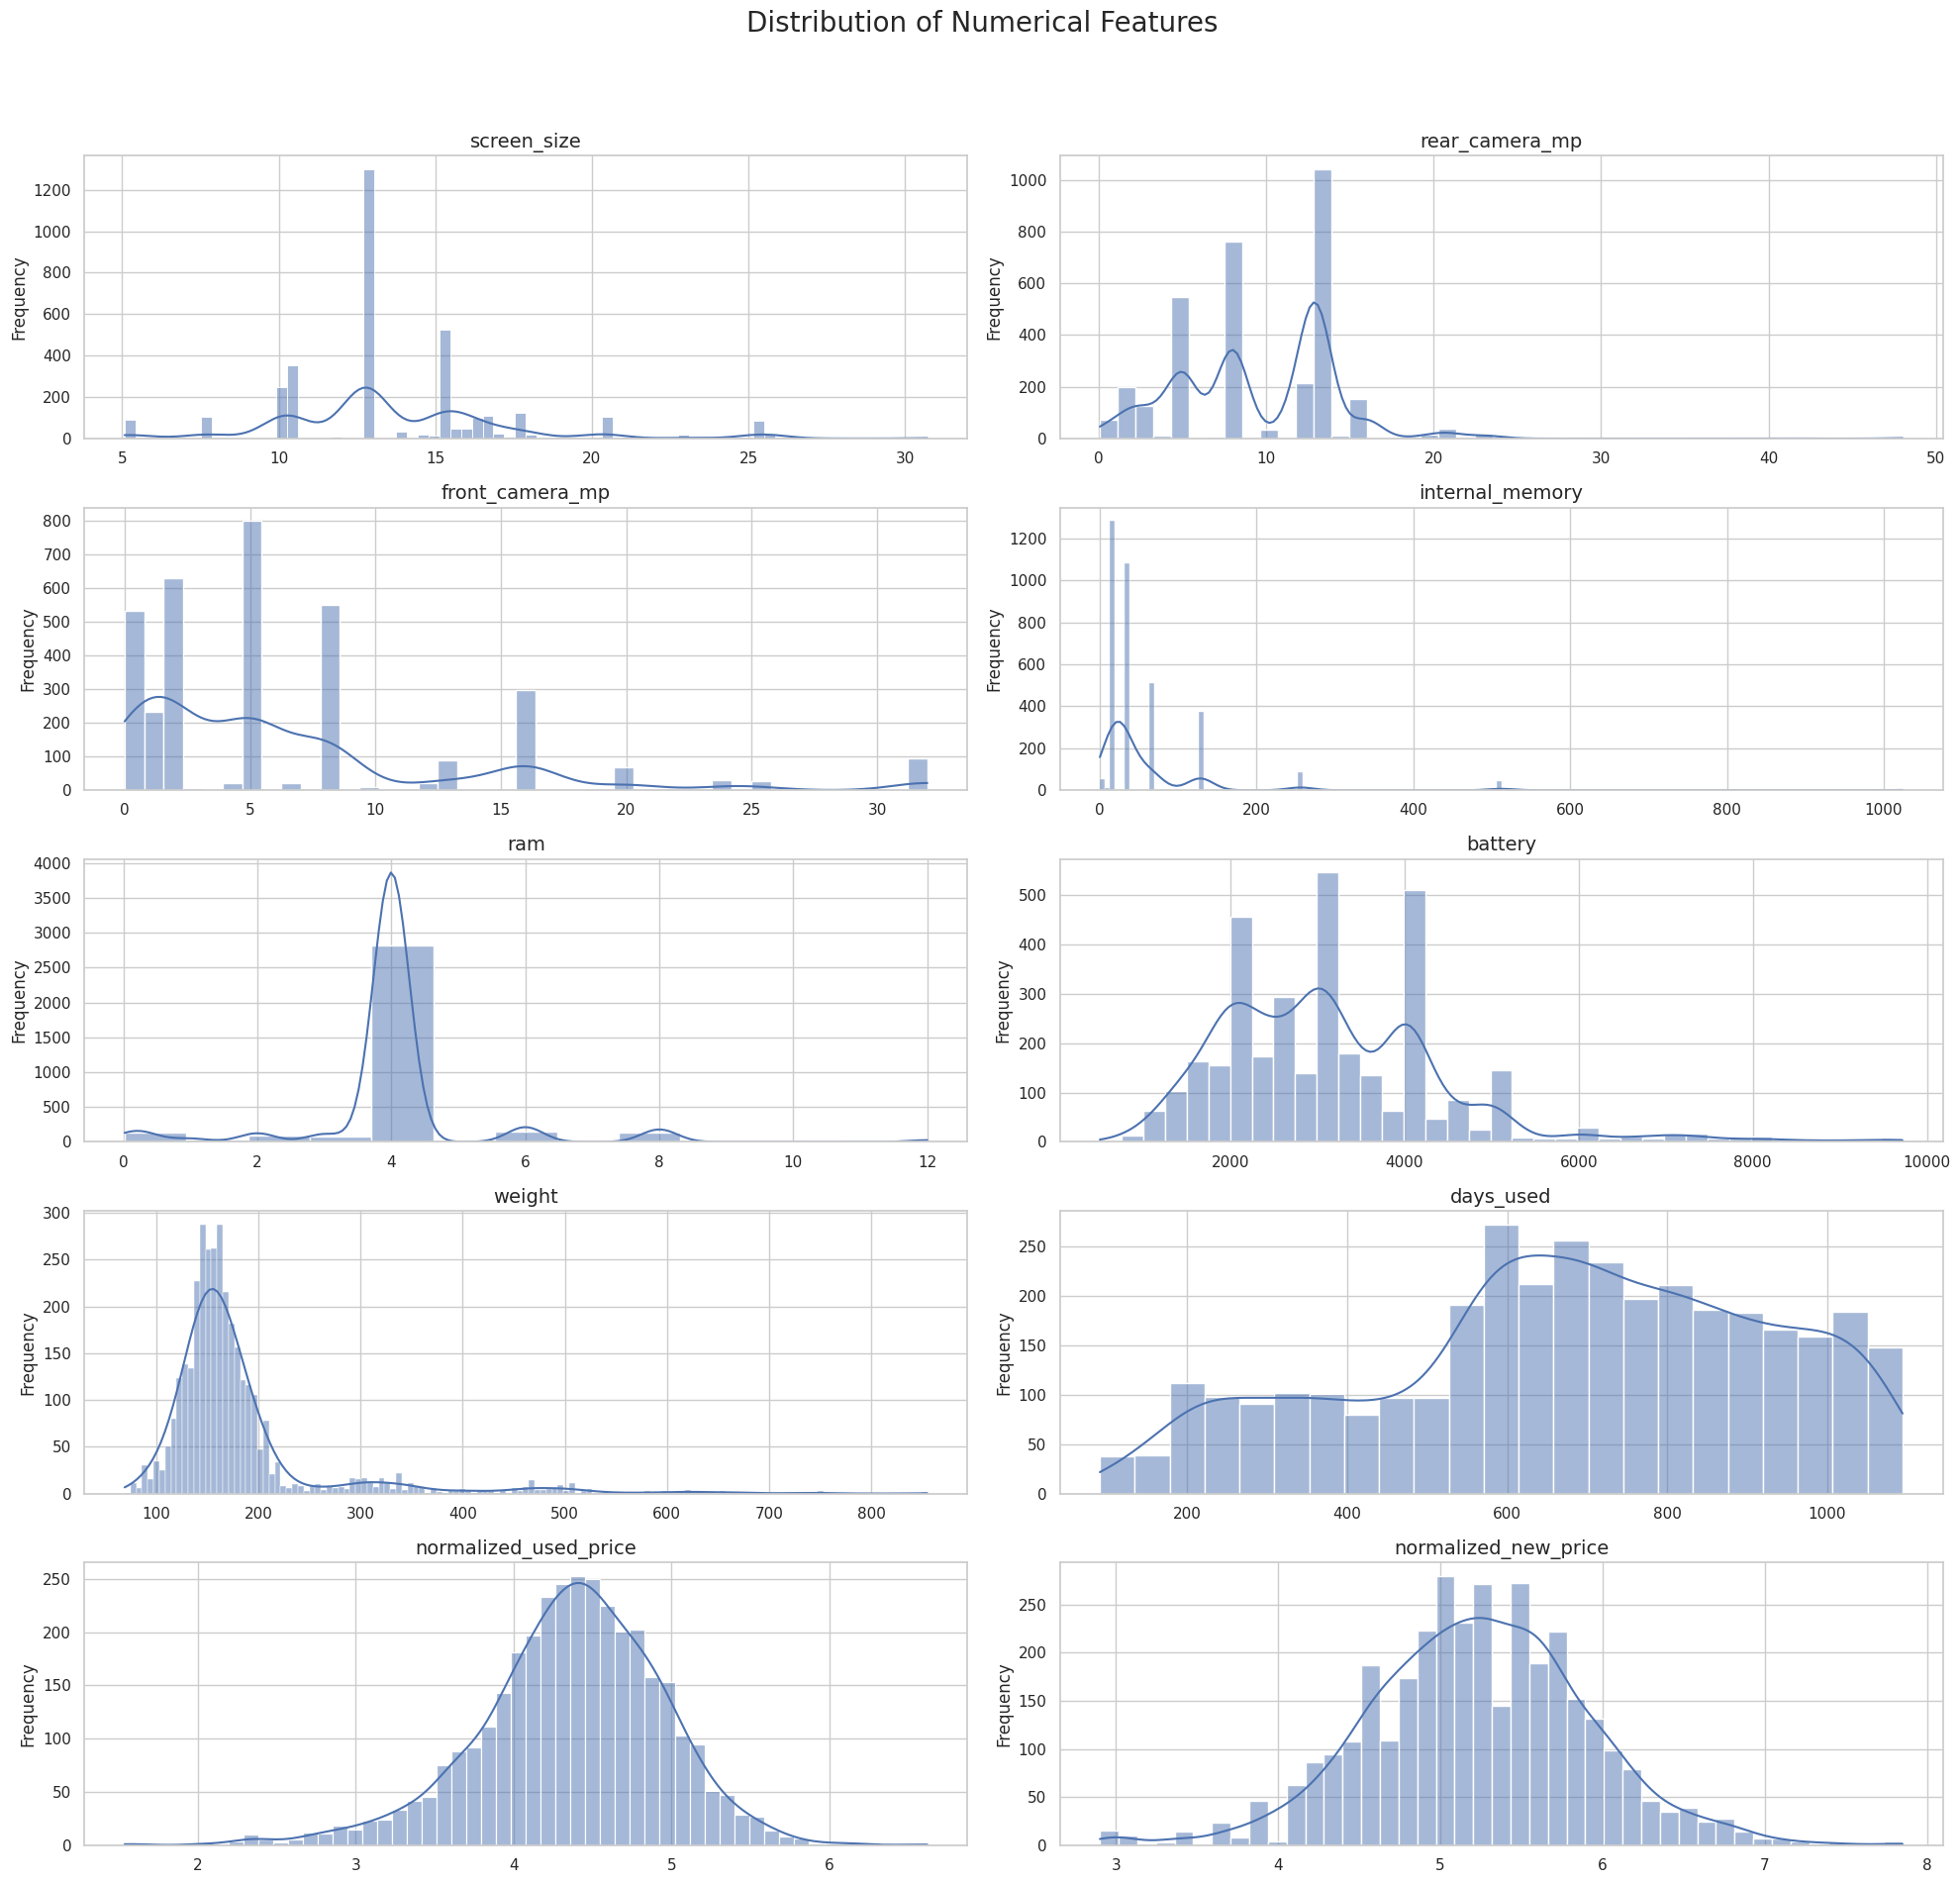

In [ ]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Selecting numerical columns for distribution plots
numerical_columns = ['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
                     'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price']

# Plotting histograms for numerical columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
fig.suptitle('Distribution of Numerical Features', fontsize=20)

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col, fontsize=14)
    axes[i//2, i%2].set_ylabel('Frequency')
    axes[i//2, i%2].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Screen Size:** Most devices have screen sizes ranging between roughly 14 to 25 inches, with a concentration around 15-20 inches.

**Rear Camera Megapixels:** There's a wide range of values with several peaks, indicating specific popular configurations (e.g., 13 MP).

**Front Camera Megapixels:** This feature also shows a range of values, with some concentrations around lower megapixel counts.

**Internal Memory:** The distribution shows peaks at common memory sizes, such as 64 GB and 128 GB.
RAM: Concentrated around common RAM sizes, such as 3 GB, 6 GB, and 8 GB.

**Battery:** Shows a range of battery capacities, with a peak around 3000-5000 mAh.

**Weight:** The weight of devices varies widely, with a concentration in the lower range.

**Days Used:** The distribution of days used shows a wide range, indicating both relatively new and more extensively used devices.

**Normalized Used Price:** There's a range of prices for used devices, with a skewed distribution towards lower prices.

**Normalized New Price:** Similar to used prices, new prices also show a skewed distribution towards the lower end, but with a slightly broader range.

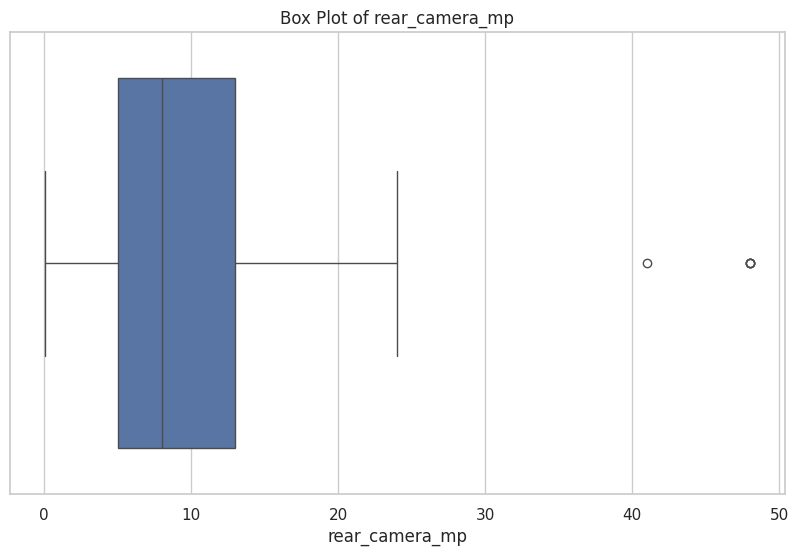

{'Q1': 5.0,
 'Q3': 13.0,
 'IQR': 8.0,
 'Lower Bound': -7.0,
 'Upper Bound': 25.0,
 'Outliers Count': 5}

In [ ]:
# Selecting a numerical feature to analyze for outliers
feature = 'rear_camera_mp'

# Plotting the box plot for the selected feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[feature])
plt.title(f'Box Plot of {feature}')
plt.show()

# Calculating IQR to identify outliers
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Displaying the IQR and bounds
IQR_details = {
    "Q1": Q1,
    "Q3": Q3,
    "IQR": IQR,
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound,
    "Outliers Count": outliers.shape[0]
}

IQR_details


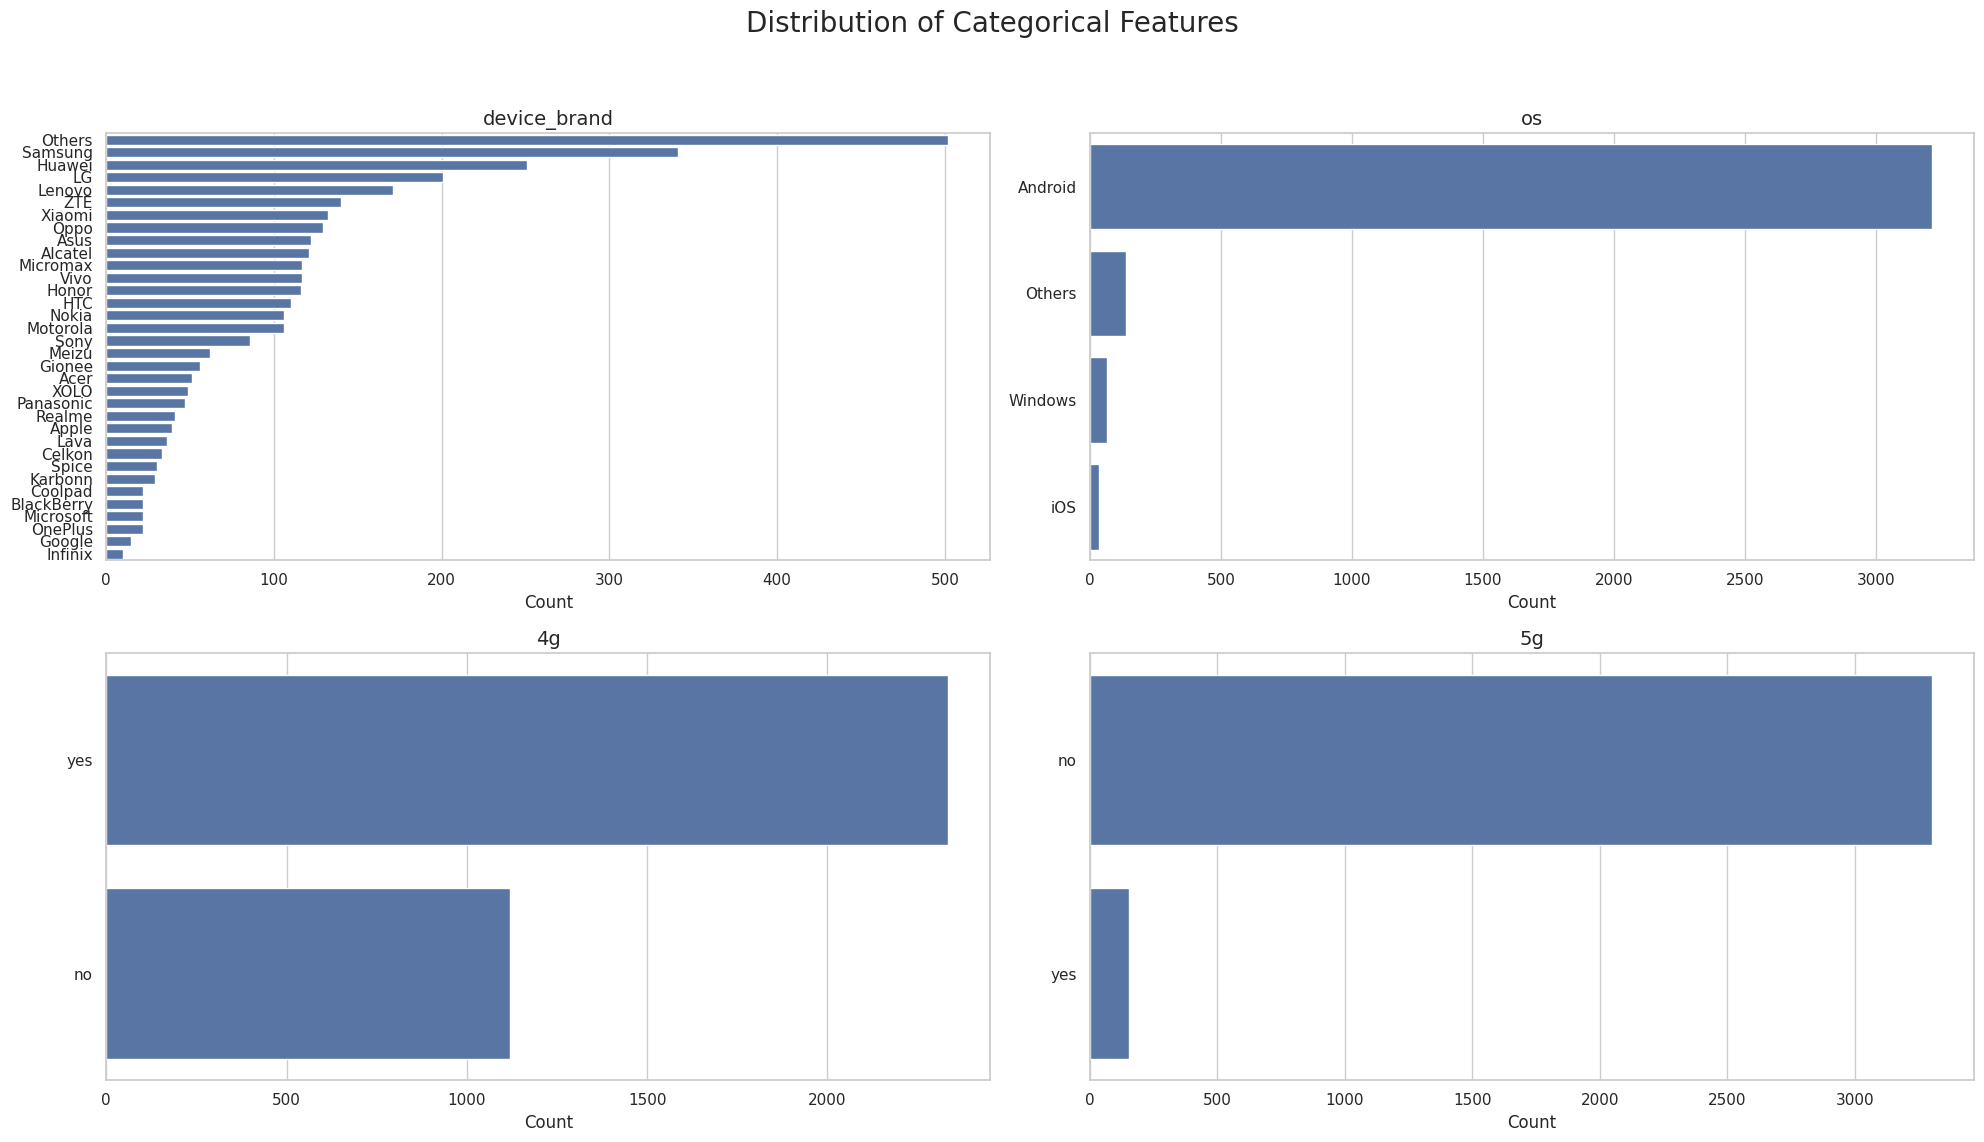

In [ ]:
# Analyzing distributions of categorical features
categorical_columns = ['device_brand', 'os', '4g', '5g']

# Plotting bar plots for categorical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
fig.suptitle('Distribution of Categorical Features', fontsize=20)

for i, col in enumerate(categorical_columns):
    sns.countplot(y=df[col],  ax=axes[i//2, i%2], order = df[col].value_counts().index)
    axes[i//2, i%2].set_title(col, fontsize=14)
    axes[i//2, i%2].set_xlabel('Count')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

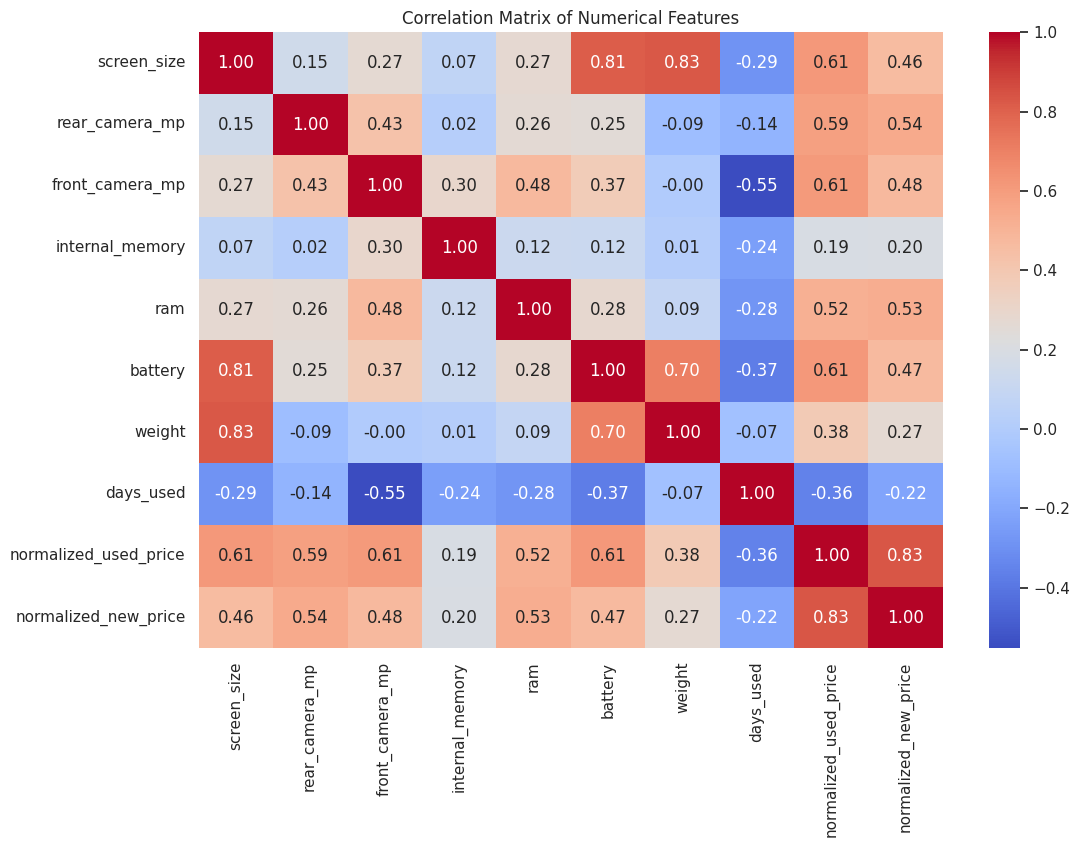

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()